## Data Description: 

The file Bank.xls contains data on 5000 customers. The data include customer
demographic information (age, income, etc.), the customer's relationship with
the bank (mortgage, securities account, etc.), and the customer response to the
last personal loan campaign (Personal Loan). Among these 5000 customers,
only 480 (= 9.6%) accepted the personal loan that was offered to them in the
earlier campaign.

## Domain: 

Banking

## Context 

This case is about a bank (Thera Bank) whose management wants to explore
ways of converting its liability customers to personal loan customers (while
retaining them as depositors). A campaign that the bank ran last year for liability
customers showed a healthy conversion rate of over 9% success. This has
encouraged the retail marketing department to devise campaigns with better
target marketing to increase the success ratio with minimal budget.

## Attribute Information:


ID : Customer ID

Age : Customer's age in completed years

Experience : #years of professional experience

Income : Annual income of the customer ($000)

ZIP Code : Home Address ZIP code.

Family : Family size of the customer

CCAvg : Avg. spending on credit cards per month ($000)

Education : Education Level.
    1. Undergrad
    2. Graduate
    3. Advanced/Professional
    
Mortgage : Value of house mortgage if any. ($000)

Personal Loan : Did this customer accept the personal loan offered in
the last campaign?

Securities Account : Does the customer have a securities account with
the bank?

CD Account : Does the customer have a certificate of deposit (CD)
 account with the bank?

Online : Does the customer use internet banking facilities?

Credit card : Does the customer use a credit card issued by
 UniversalBank?
 








## Objective

The classification goal is to predict the likelihood of a liability customer buying
personal loans.


## Importing the necessary libraries:


In [144]:
import numpy as np # for dataframe handling
import pandas as pd #array handling
import seaborn as sns # plotting
sns.set(color_codes=True)
import matplotlib.pyplot as plt # plotting
%matplotlib inline
# For preprocessing the data

from sklearn import preprocessing
# To split the dataset into train and test datasets
from sklearn.model_selection import train_test_split

from scipy import stats
from sklearn import metrics
# To model the Logistic Regression
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report,confusion_matrix
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')



### Reading the data

In [145]:
data=pd.read_csv('Bank_Personal_loan_Modelling.csv')

In [146]:
data.head() #to display first five records of the dataset.

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


From the above table I found that the Target Column(Personal Loan) is in the middle of DataFrame . For More convenience I am rearanging the Targeted Column to the Last of dataframe

In [147]:
p_loan = data['Personal Loan'] #adding personal loan to a new dataframe
data.drop(['Personal Loan'],axis=1,inplace=True)#droping personal loan from the dataset
data['Personal Loan']=p_loan # appending Targeted Column to the Last of dataframe 
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0


In [148]:
data.shape #no of rows and columns in the dataframe

(5000, 14)

There are 5000 rows and 14 Columns in the DataFrame

In [149]:
data.dtypes # to get the data type of each attributes 

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
Personal Loan           int64
dtype: object

In [150]:
data.isnull().sum() # to check the presence of missing values 

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
Personal Loan         0
dtype: int64

As the counts are 0 there is no missing values in the dataframe

In [151]:
data.describe().transpose() 

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


-Here we can see that the minimum value of Experience is -3 . As the experience cannot be negative . the negative values in experience will be replaced 

-Highest age of individual in the campaign is 67 and lowest is 23 

-The distribution of CCAvg and Income is skewed

-All other columns looks fine


### Five Point Summary

In [152]:
summary=data.describe().T
summary[['min', '25%', '50%', '75%', 'max']]

,min,25%,50%,75%,max
ID,1.0,1250.75,2500.5,3750.25,5000.0
Age,23.0,35.00,45.0,55.00,67.0
Experience,-3.0,10.00,20.0,30.00,43.0
Income,8.0,39.00,64.0,98.00,224.0
ZIP Code,9307.0,91911.00,93437.0,94608.00,96651.0
Family,1.0,1.00,2.0,3.00,4.0
CCAvg,0.0,0.70,1.5,2.50,10.0
Education,1.0,1.00,2.0,3.00,3.0
Mortgage,0.0,0.00,0.0,101.00,635.0
Securities Account,0.0,0.00,0.0,0.00,1.0


#### Fixing the error in Experience

In [153]:
data[data['Experience'] < 0]['Experience'].value_counts()

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

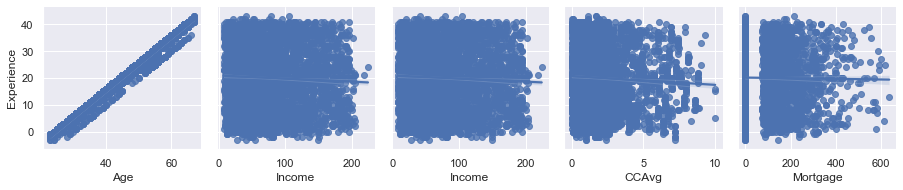

In [157]:
#Checking association of experience with other quantative variables 

q_var = ['Age', 'Income', 'Income', 'CCAvg', 'Mortgage']
exp_plot = sns.PairGrid(data, y_vars = 'Experience', x_vars = q_var)
exp_plot.map(sns.regplot);

From the graph we found that Experience is strongly associated with Age 

We know that experience is also related with education

So replacing Negative experience with median of Positive Experience associated with particular Age and Education values


In [159]:
positive_exp_data = data[data['Experience'] > 0]
negative_exp_data =  data[data['Experience'] < 0]
mylist = negative_exp_data['ID'].tolist()


In [12]:


for id in mylist:
    age = data.loc[np.where(data['ID']==id)]["Age"].tolist()[0]
    education = data.loc[np.where(data['ID']==id)]["Education"].tolist()[0]
    positive_exp_filtered = positive_exp_data[(positive_exp_data['Age'] == age) & (positive_exp_data['Education'] == education)]
    if positive_exp_filtered.empty :
        negative_exp_filtered = negative_exp_data[(negative_exp_data['Age'] == age) & (negative_exp_data['Education'] == education)]
        exp = round(negative_exp_filtered['Experience'].median())
    else:
        exp = round(positive_exp_filtered['Experience'].median())
    data.loc[data.loc[np.where(data['ID']==id)].index, 'Experience'] = abs(exp)

In [13]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.134800,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.104400,0.06040,0.596800,0.294000,0.096000
std,1443.520003,11.463166,11.414863,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.305809,0.23825,0.490589,0.455637,0.294621
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.00000,1.000000,1.000000,0.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.00000,1.000000,1.000000,1.000000


From the table we can see that Min value in Experience is 0 so we have removed the Negative Values

### Data distribution in each attributes 

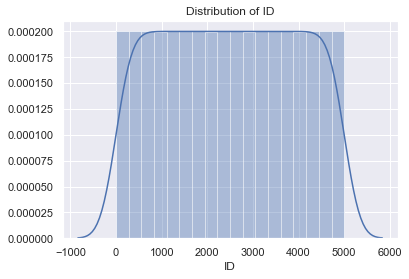

In [14]:
sns.distplot(data.ID)
plt.title('Distribution of ID')
plt.show()

The graph is Uniformly Distributed 

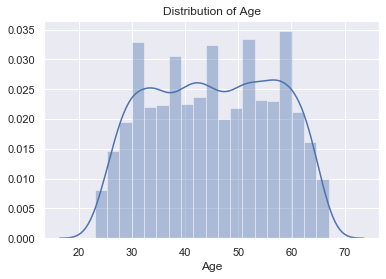

In [15]:
sns.distplot(data.Age)
plt.title('Distribution of Age')
plt.show()

The graph is normaly distributed in Age Column

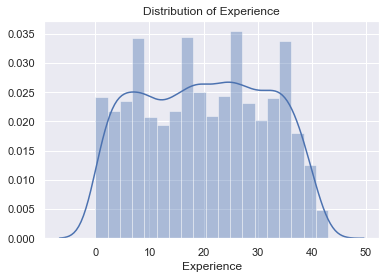

In [16]:
sns.distplot(data.Experience)
plt.title('Distribution of Experience')
plt.show()

Thr column Experience is normally distributed 

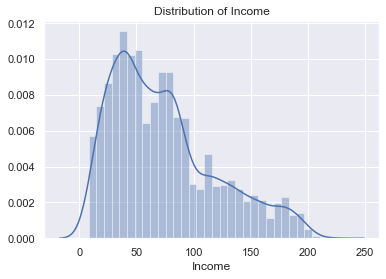

In [17]:
sns.distplot(data.Income)
plt.title('Distribution of Income')
plt.show()

Income is right skewed distribution

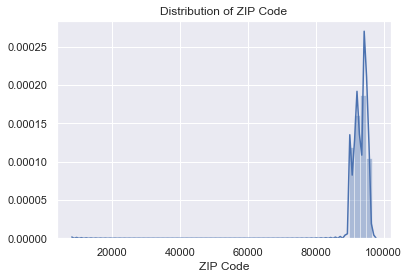

In [18]:
sns.distplot(data['ZIP Code'])
plt.title('Distribution of ZIP Code')
plt.show()

ZIP Code is uniformly DIstributed

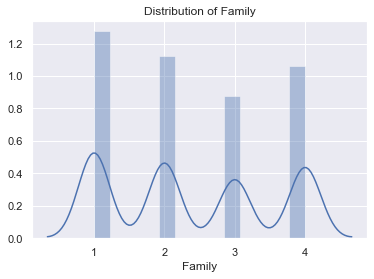

In [19]:
sns.distplot(data.Family)
plt.title('Distribution of Family')
plt.show()

Majority of the customers are Having a Family size of 1 followed by customers having family size of 2,4 and 3 respectively

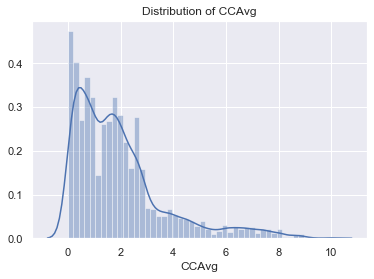

In [20]:
sns.distplot(data.CCAvg)
plt.title('Distribution of CCAvg')
plt.show()

CCAvg is right skewed distribution with Avg. spending on credit cards per month of most of the customers between 1000 Dollars to 2500 Dollars  .there are only few customers whose monthly avg is more than 8000$

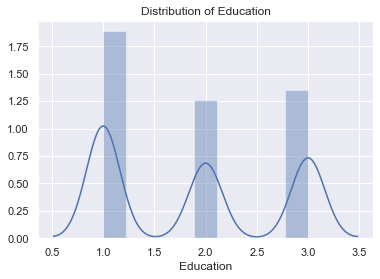

In [21]:
sns.distplot(data.Education)
plt.title('Distribution of Education')
plt.show()

There are more number of Undergraduate Customers than Graduate and Advanced/Professional Customers

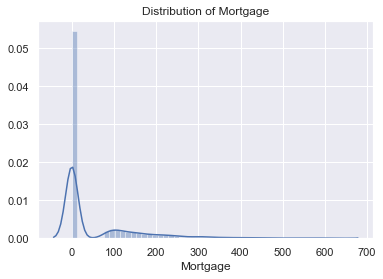

In [22]:
sns.distplot(data.Mortgage)
plt.title('Distribution of Mortgage')
plt.show()

The distribution is right skewed

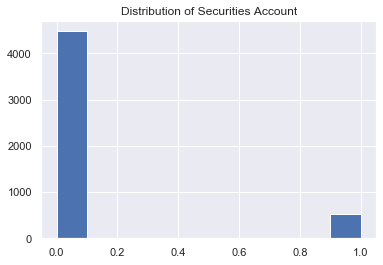

In [23]:
plt.hist(data['Securities Account'])
plt.title('Distribution of Securities Account')
plt.show()

Around 90% of the customers donot have Sercurity Account

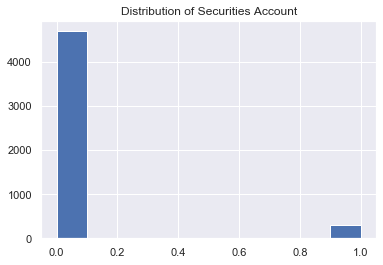

In [24]:
plt.hist(data['CD Account'])
plt.title('Distribution of Securities Account')
plt.show()

Around 95% of the customers donot have Cash Deposit Accounts

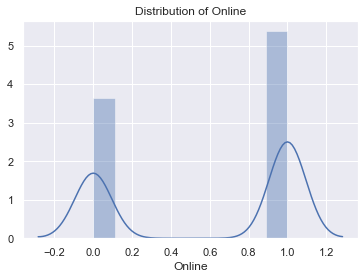

In [25]:
sns.distplot(data.Online)
plt.title('Distribution of Online')
plt.show()

Number of customers Having online account is greater than the number of who donot have online account

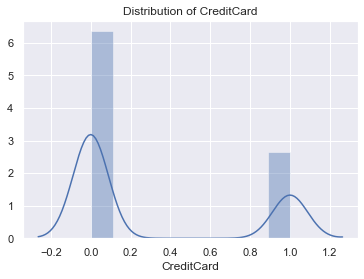

In [26]:
sns.distplot(data.CreditCard)
plt.title('Distribution of CreditCard')
plt.show()

Number of customers without the credit card is almost the double of those who have the Credit Card

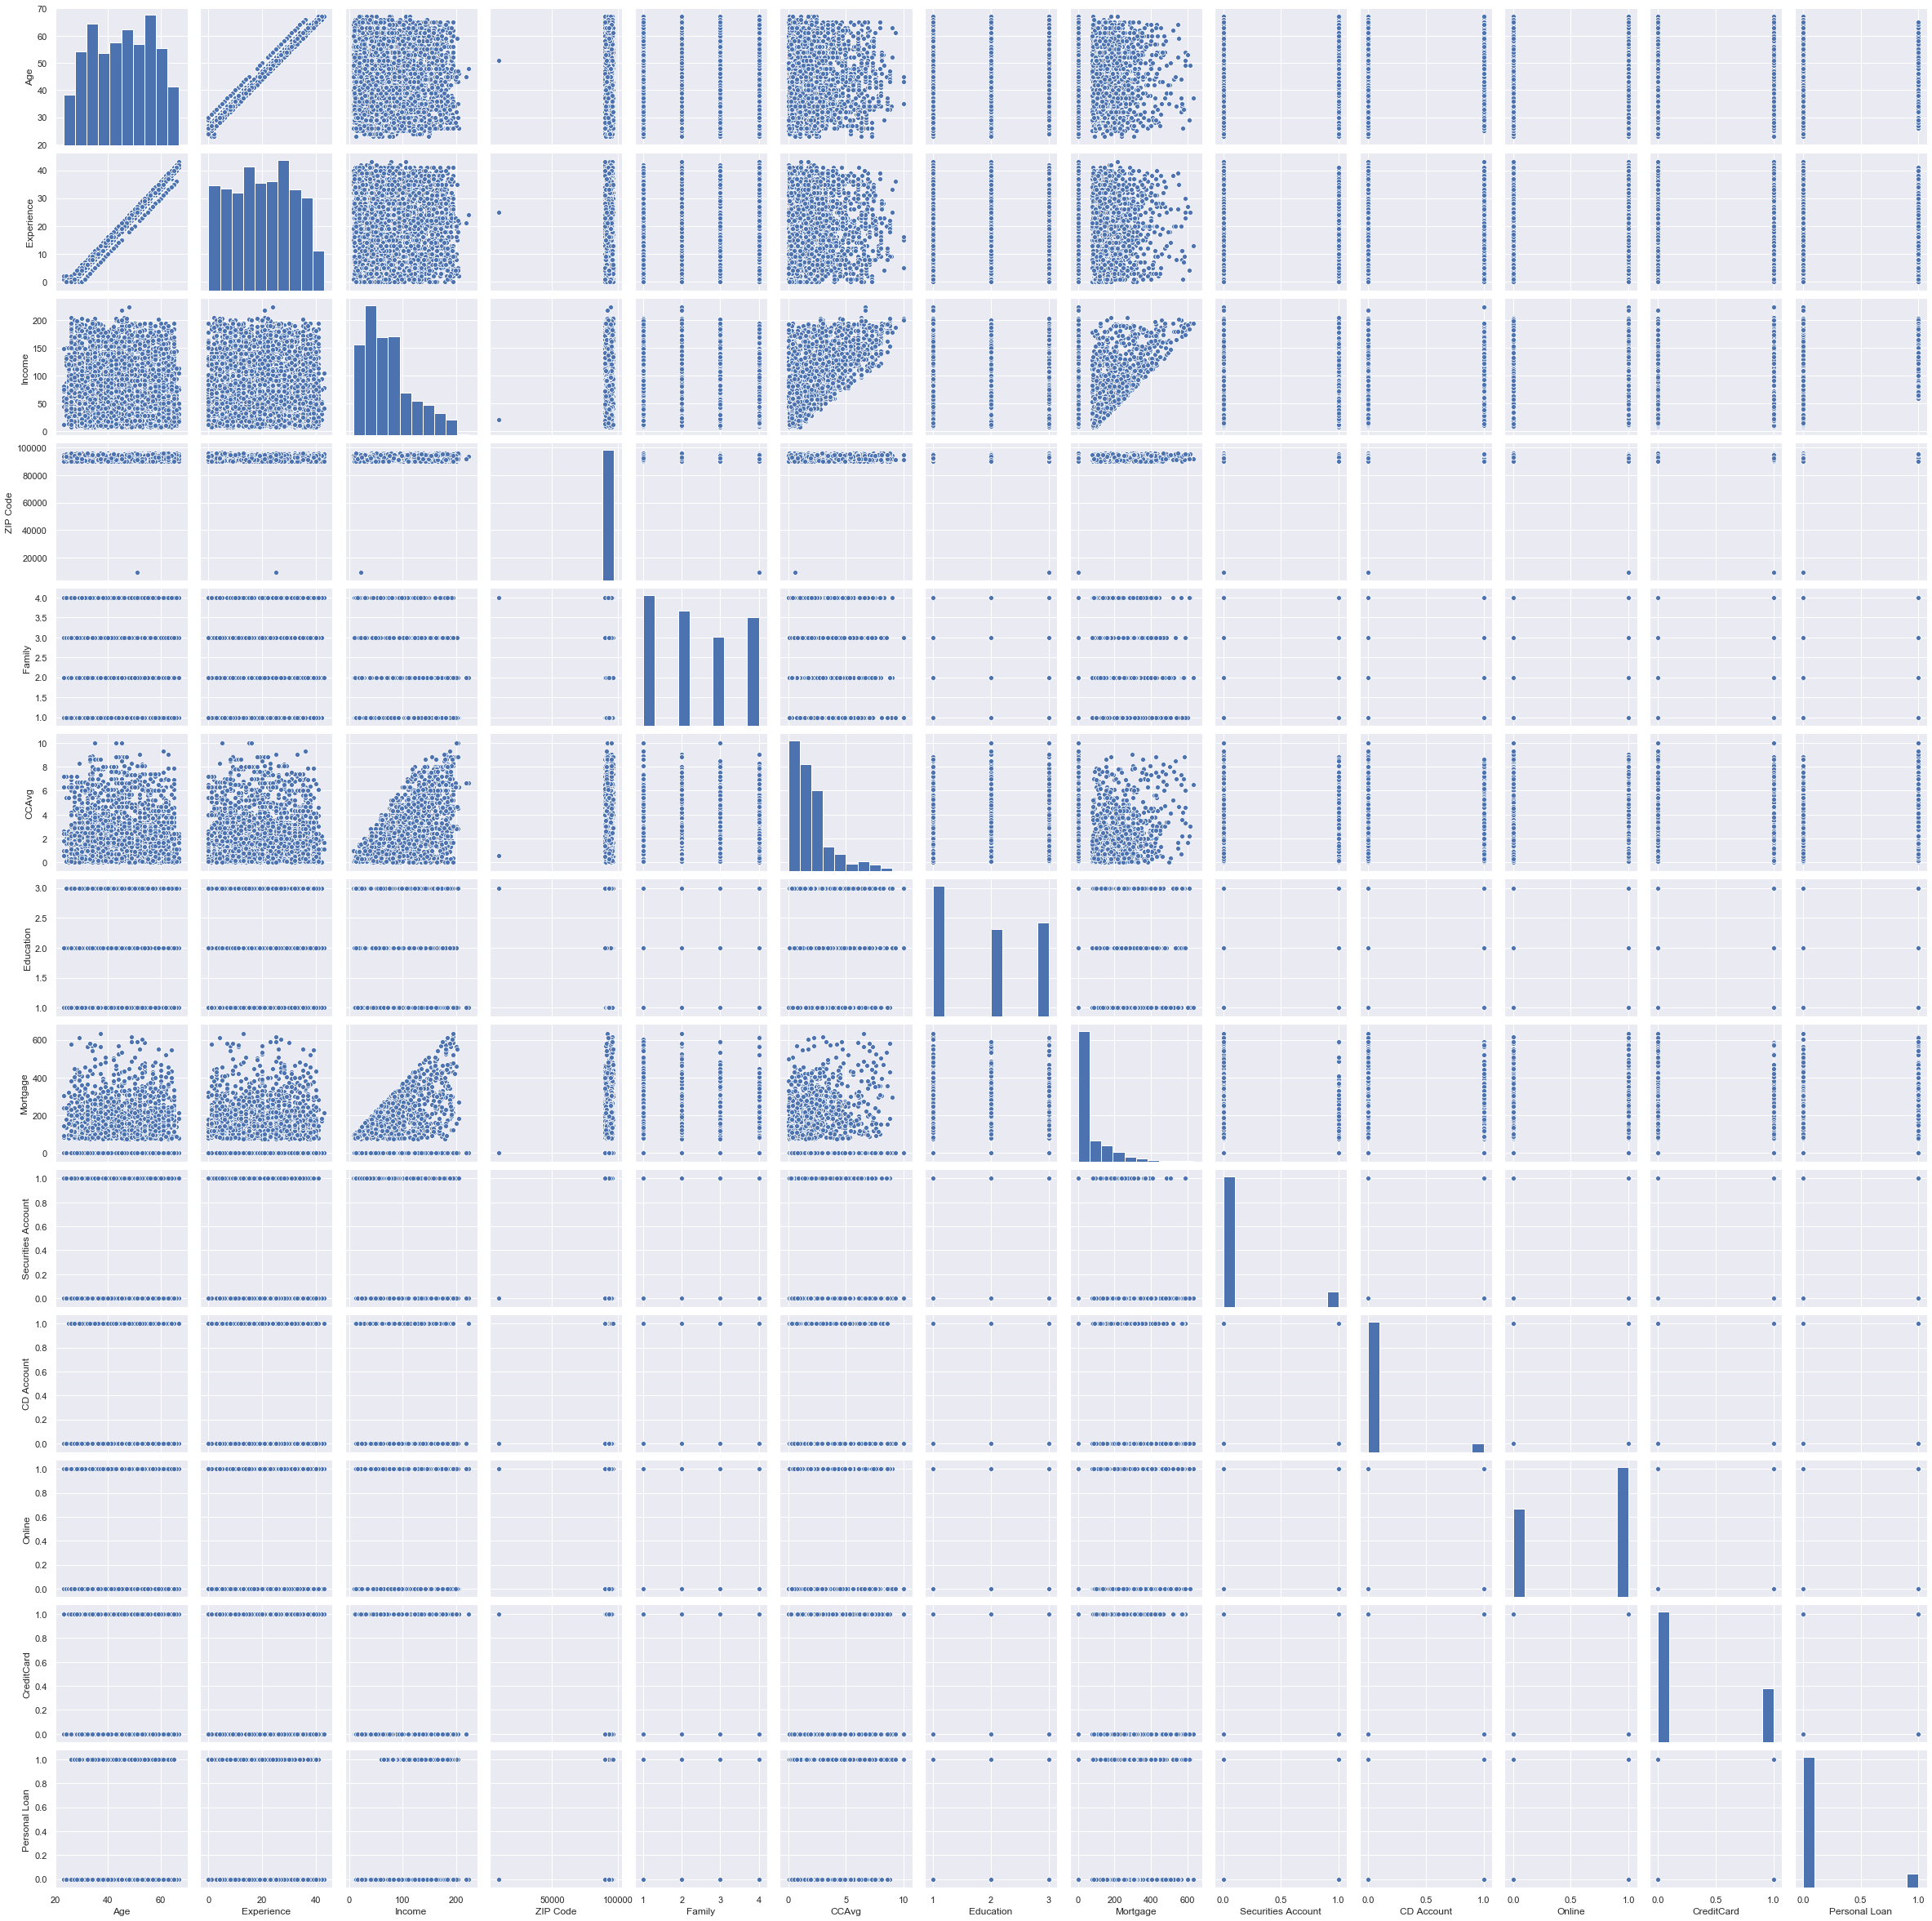

In [27]:
sns.pairplot(data.iloc[:,1:]) 

From the above graphs we undrestand

-Experience and Age has STrong +ve association

-Family has low association with Personal Loan

-Age has low association with Personal Loan

### Target Column Distribution

In [28]:
Ploan_counts = pd.DataFrame(data["Personal Loan"].value_counts()).reset_index()
Ploan_counts.columns =["Labels","Personal Loan"]
Ploan_counts

,Labels,Personal Loan
0,0,4520
1,1,480


From the above table we understand out of 5000 datas there are 4520 people who dosent take loans and 480 people who took loan 

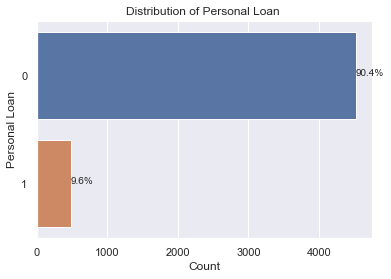

In [29]:
ax=sns.countplot(y="Personal Loan", data=data)
plt.title('Distribution of Personal Loan ')
plt.xlabel('Count')

total = len(data["Personal Loan"])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

From the above graph we understand 90.4% of the customers and not taking a loan and rest have taken the loan

### Influence of Different attributes on Personal Loan 

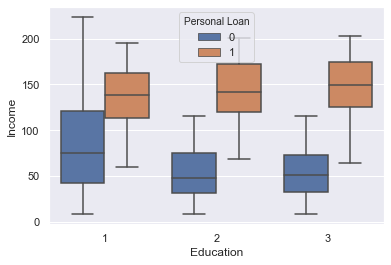

In [30]:
sns.boxplot(x="Education", y="Income", hue="Personal Loan", data=data);

The box plots show that those with education level 1 have higher incomes. But customers who go for personal loans have the same income distribution regardless of the education level.

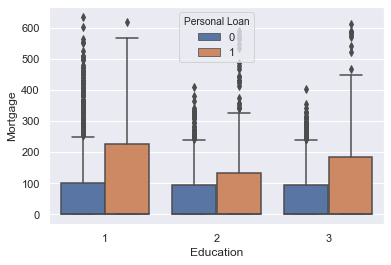

In [31]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=data)

From the above graph we understand that Customers who taken loan have Higher Mortgages

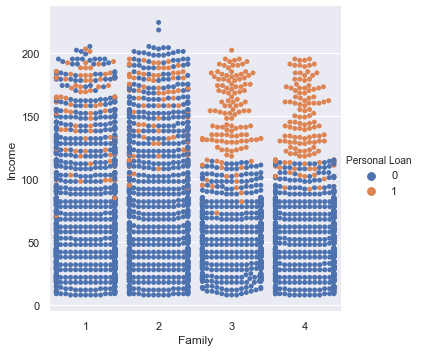

In [32]:
sns.catplot(x='Family', y='Income', hue='Personal Loan', data = data ,kind='swarm')

From the graph we understand that the customers with Family size 3 and 4 and with an income above 100k are more likely to take loan

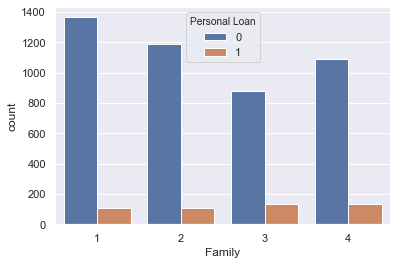

In [33]:
sns.countplot(x='Family',data=data,hue='Personal Loan')

Family Size is not having any impact on Personal Loan 

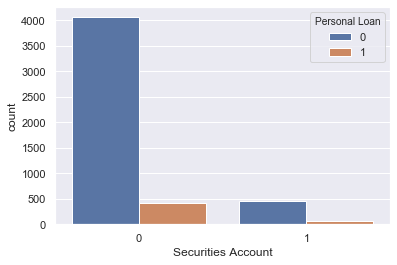

In [34]:
sns.countplot(x="Securities Account", data=data,hue="Personal Loan")

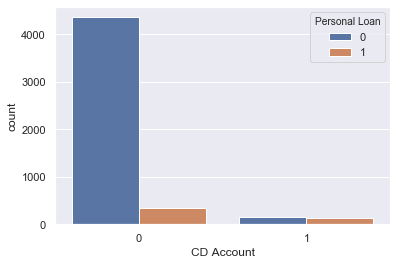

In [35]:
sns.countplot(x='CD Account',data=data,hue='Personal Loan')

Almost all costomers having a CD account has a Loan

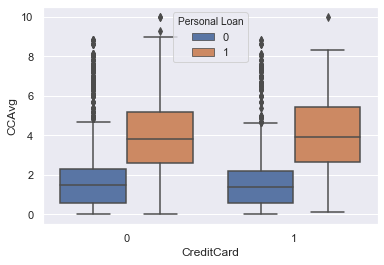

In [36]:
sns.boxplot(x="CreditCard", y='CCAvg', hue="Personal Loan", data=data)

Customers having a Credit card and high monthly spend are more likely to take loan

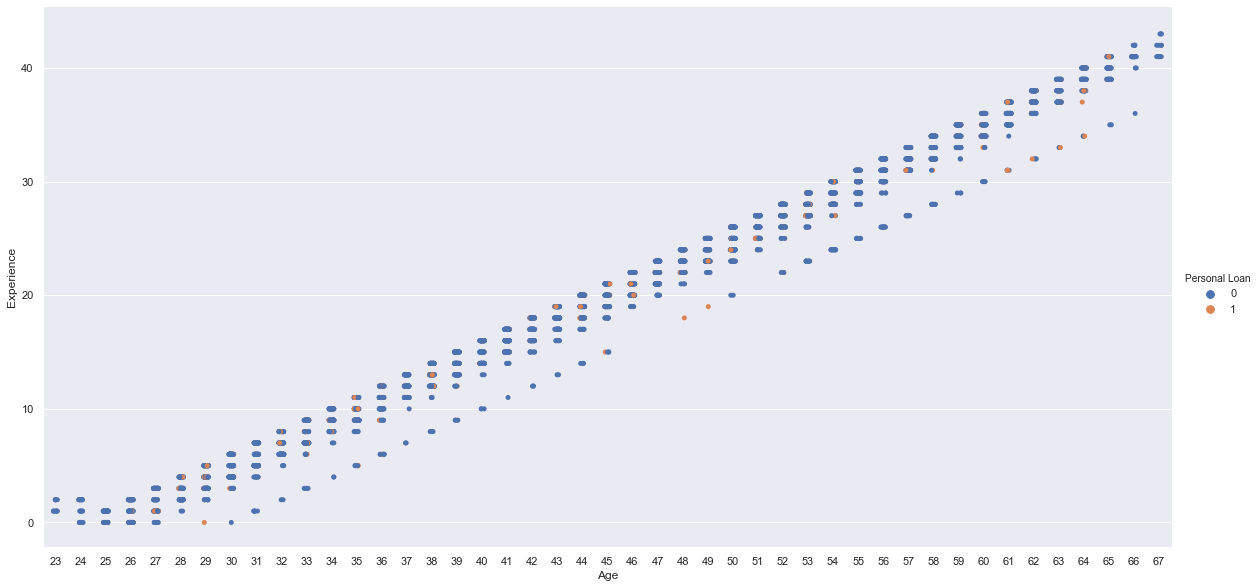

In [37]:
sns.catplot(x='Age', y='Experience', hue='Personal Loan', data = data, height=8.27, aspect=8/4)

From the above graph it is clear that Age and Experience are Strongly Associated ,Experience increases as the Age increases 

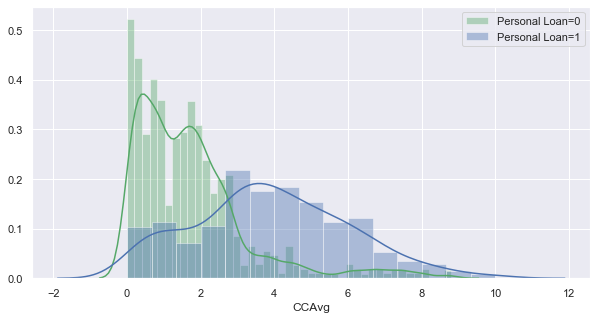

In [38]:
plt.figure(figsize=(10,5))
sns.distplot( data[data['Personal Loan'] == 0]['CCAvg'], color = 'g',label='Personal Loan=0')
sns.distplot( data[data['Personal Loan'] == 1]['CCAvg'], color = 'b',label='Personal Loan=1')
plt.legend()

Customers who have taken personal loan have higher credit card average than those who did not take

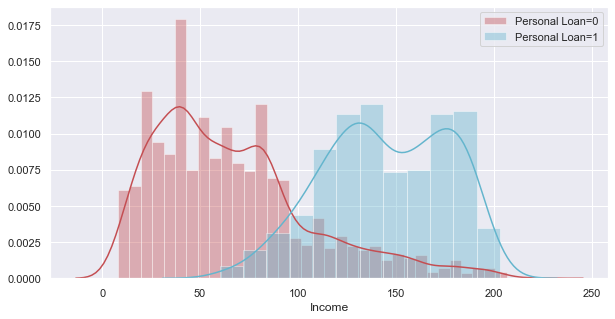

In [39]:
plt.figure(figsize=(10,5))
sns.distplot( data[data['Personal Loan'] == 0]['Income'], color = 'r',label='Personal Loan=0')
sns.distplot( data[data['Personal Loan'] == 1]['Income'], color = 'c',label='Personal Loan=1')
plt.legend()

Customers who have taken personal loan have higher Income  than those who did not take

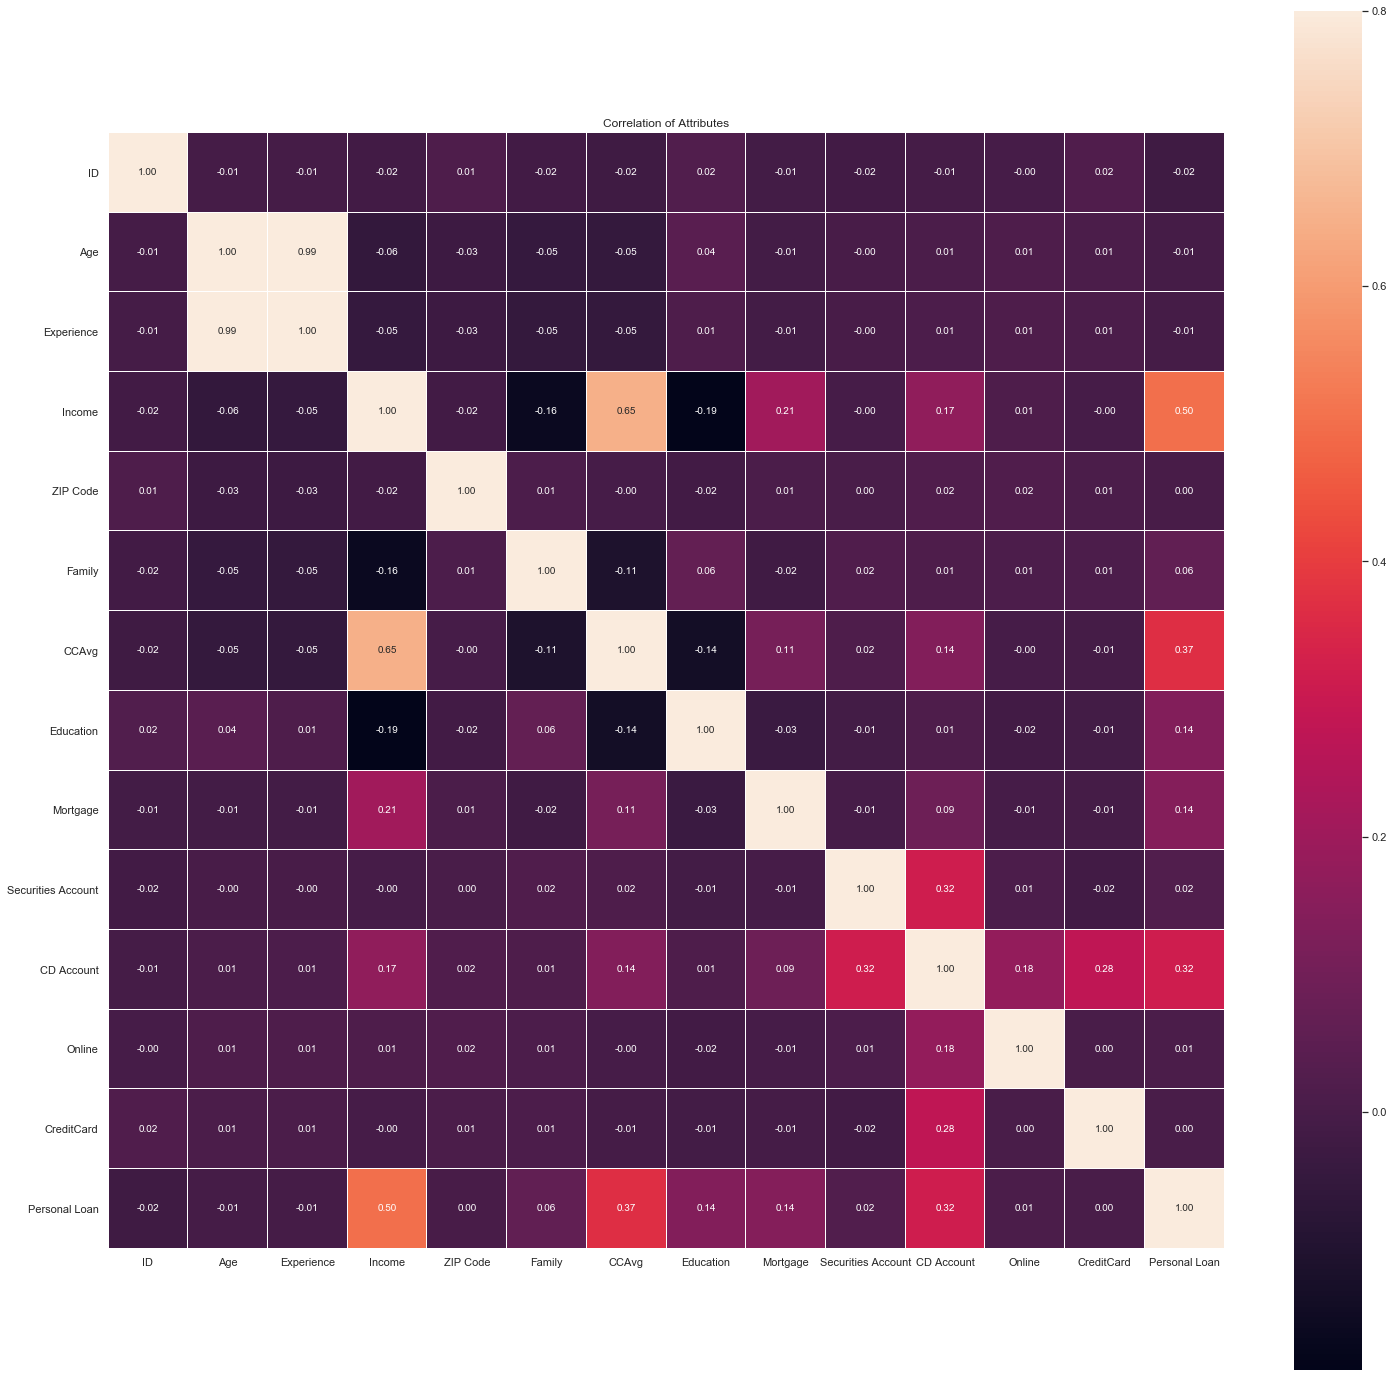

In [40]:
plt.figure(figsize=(25, 25))
ax = sns.heatmap(data.corr(), vmax=.8, square=True, fmt='.2f', annot=True, linecolor='white', linewidths=0.01)
plt.title('Correlation of Attributes')
plt.show()

-Age and Experoence is highly corelated

-Income and CCAvg is moderately corelated

### Droping Non Relevent  Columns 

As we have seen above 'ID' and 'ZIP Code' are not relevent for our model building so we will drop it.

In [41]:
data = data.drop(['ID','ZIP Code'], axis=1)

In [42]:
data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,25,1,49,4,1.6,1,0,1,0,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1,0


### Spliting the data into training and test set in the ratio of 70:30 respectively 

In [66]:
X=data.drop('Personal Loan', axis=1)
y=data[['Personal Loan']]


In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)# Fit the model on train

In [107]:
print('x train data {}'.format(X_train.shape))
print('y train data {}'.format(y_train.shape))
print('x test data  {}'.format(X_test.shape))
print('y test data  {}'.format(y_test.shape))

x train data (3500, 11)
y train data (3500, 1)
x test data  (1500, 11)
y test data  (1500, 1)


In [108]:
print("Original Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(data.loc[data['Personal Loan'] == 1]), (len(data.loc[data['Personal Loan'] == 1])/len(data.index)) * 100))
print("Original Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(data.loc[data['Personal Loan'] == 0]), (len(data.loc[data['Personal Loan'] == 0])/len(data.index)) * 100))
print("")
print("Training Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train['Personal Loan'] == 1]), (len(y_train[y_train['Personal Loan'] == 1])/len(y_train)) * 100))
print("Training Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train['Personal Loan'] == 0]), (len(y_train[y_train['Personal Loan'] == 0])/len(y_train)) * 100))
print("")
print("Test Personal Loan True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test['Personal Loan'] == 1]), (len(y_test[y_test['Personal Loan'] == 1])/len(y_test)) * 100))
print("Test Personal Loan False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test['Personal Loan'] == 0]), (len(y_test[y_test['Personal Loan'] == 0])/len(y_test)) * 100))
print("")

Original Personal Loan True Values    : 480 (9.60%)
Original Personal Loan False Values   : 4520 (90.40%)

Training Personal Loan True Values    : 331 (9.46%)
Training Personal Loan False Values   : 3169 (90.54%)

Test Personal Loan True Values        : 149 (9.93%)
Test Personal Loan False Values       : 1351 (90.07%)



## Logistic Regression

In [135]:

model = LogisticRegression()
model.fit(X_train, y_train)
y_predicted=model.predict(X_test)
model_score=model.score(X_test, y_test)
log_accuracy = accuracy_score(y_test,y_predicted)

recall_score=metrics.recall_score(y_test, y_predicted, average='binary')
precision_score=metrics.precision_score(y_test, y_predicted, average='binary')
f1_score=metrics.f1_score(y_test, y_predicted, average='binary')
    
    
print('Logistic Regression Model Accuracy Score : {}'.format(log_accuracy))
print('Model Recall Score : {}'.format(recall_score))
print('Model Precision Score : {}'.format(precision_score))
print('Model F1 Score : {}'.format(f1_score))


Logistic Regression Model Accuracy Score : 0.9486666666666667
Model Recall Score : 0.5838926174496645
Model Precision Score : 0.8529411764705882
Model F1 Score : 0.6932270916334662


In [110]:
print('\nK-NN classification Report : \n',metrics.classification_report(y_test,y_predicted))


K-NN classification Report : 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      1351
           1       0.83      0.55      0.66       149

    accuracy                           0.94      1500
   macro avg       0.89      0.77      0.82      1500
weighted avg       0.94      0.94      0.94      1500



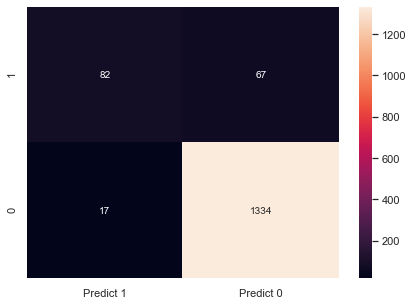

In [111]:
#confusion matrix
cm=metrics.confusion_matrix(y_test,y_predicted, labels=[1, 0]) 

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g')

## K-Nearest Neighbor

#### Standardizing

In [115]:
from scipy.stats import zscore
XScaled  = X.apply(zscore)  # convert all attributes to Z scale 
 #XScaled.describe()
X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size=0.30, random_state=1)

#### Finding The best K

In [116]:

# creating odd list of K for KNN
myList = list(range(1,20))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # predict the response
    y_pred = knn.predict(X_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)


The optimal number of neighbors is 3


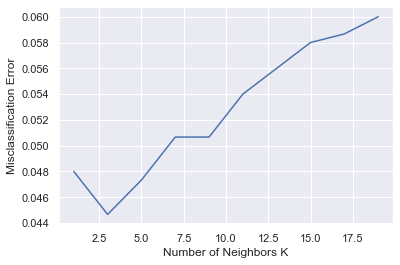

In [117]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [119]:
#Use k=3 as the final model for prediction
knn = KNeighborsClassifier(n_neighbors =optimal_k)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
knn_accuracy_score=accuracy_score(y_test, y_pred)


print('KNN_Model Accuracy Score : {}'.format(knn_accuracy_score))


KNN_Model Accuracy Score : 0.9553333333333334


In [120]:
print('\nK-NN classification Report : \n',metrics.classification_report(y_test, y_pred))


K-NN classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      1351
           1       0.90      0.62      0.73       149

    accuracy                           0.96      1500
   macro avg       0.93      0.81      0.85      1500
weighted avg       0.95      0.96      0.95      1500



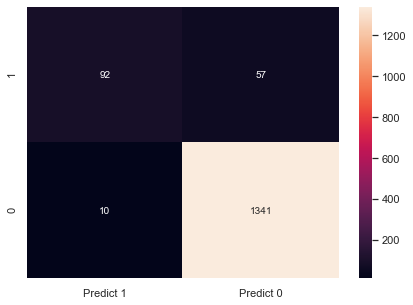

In [121]:
#confusion matrix
knn_cm=metrics.confusion_matrix(y_test,y_pred, labels=[1, 0]) 

df_knn_cm = pd.DataFrame(knn_cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_knn_cm, annot=True,fmt='g')

In [122]:
print('\nTrue Possitive    = ', knn_cm[0][0])
print('True Negative     = ',   knn_cm[1][1])
print('False Possive     = ',   knn_cm[0][1])
print('False Negative    = ',   knn_cm[1][0])


True Possitive    =  92
True Negative     =  1341
False Possive     =  57
False Negative    =  10


## Naive Bayes

In [129]:
nb_model = GaussianNB()
nb_model.fit(X_train,y_train)
nb_y_pred = nb_model.predict(X_test)
nb_score = nb_model.score(X_test, y_test)
nb_accuracy = accuracy_score(y_test, nb_y_pred)

print('NB_Model Accuracy Score : {}'.format(nb_accuracy))

NB_Model Accuracy Score : 0.8746666666666667


In [130]:
print('\nK-NN classification Report : \n',metrics.classification_report(y_test, nb_y_pred))


K-NN classification Report : 
               precision    recall  f1-score   support

           0       0.95      0.91      0.93      1351
           1       0.41      0.56      0.47       149

    accuracy                           0.87      1500
   macro avg       0.68      0.74      0.70      1500
weighted avg       0.90      0.87      0.88      1500



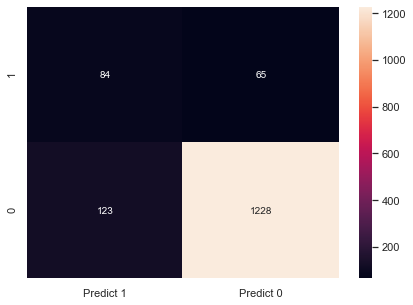

In [132]:
#confusion matrix
nb_cm=metrics.confusion_matrix(y_test, nb_y_pred, labels=[1, 0]) 

df_nb_cm = pd.DataFrame(nb_cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_nb_cm, annot=True,fmt='g')



In [134]:
print('\nTrue Possitive    = ', nb_cm[0][0])
print('True Negative     = ',   nb_cm[1][1])
print('False Possive     = ',   nb_cm[0][1])
print('False Negative    = ',   nb_cm[1][0])


True Possitive    =  84
True Negative     =  1228
False Possive     =  65
False Negative    =  123


## Logistic Regression,KNN,Naive Bayes - Comparison

### Overall Model accuracy

In [138]:
print('Logistic Regression Model Accuracy Score :{0:.0f}%'.format(log_accuracy*100))
print('K-Nearest Neighbors Model Accuracy Score : {0:.0f}%'.format(knn_accuracy_score*100))
print('Naive Bayes Model Accuracy Score : {0:.0f}%'.format(nb_accuracy*100))


Logistic Regression Model Accuracy Score :95%
K-Nearest Neighbors Model Accuracy Score : 96%
Naive Bayes Model Accuracy Score : 87%


### Overall Confusion Matrix

In [142]:
print('\nLogistic Regression: \n', cm)
print('\nTrue Possitive    = ', cm[0][0])
print('True Negative     = ',   cm[1][1])
print('False Possive     = ',   cm[0][1])
print('False Negative    = ',   cm[1][0])


print('\nK-Nearest Neighbors: \n', knn_cm)
print('\nTrue Possitive    = ', knn_cm[0][0])
print('True Negative     = ',   knn_cm[1][1])
print('False Possive     = ',   knn_cm[0][1])
print('False Negative    = ',   knn_cm[1][0])


print('\nNaive Bayes: \n', nb_cm)
print('\nTrue Possitive    = ', nb_cm[0][0])
print('True Negative     = ',   nb_cm[1][1])
print('False Possive     = ',   nb_cm[0][1])
print('False Negative    = ',   nb_cm[1][0])


Logistic Regression: 
 [[  82   67]
 [  17 1334]]

True Possitive    =  82
True Negative     =  1334
False Possive     =  67
False Negative    =  17

K-Nearest Neighbors: 
 [[  92   57]
 [  10 1341]]

True Possitive    =  92
True Negative     =  1341
False Possive     =  57
False Negative    =  10

Naive Bayes: 
 [[  84   65]
 [ 123 1228]]

True Possitive    =  84
True Negative     =  1228
False Possive     =  65
False Negative    =  123


## Best Model

##### - From the above ,We can see that KNN Algorithm has best accuracy of 96%
##### - Type I and Type II errors are least in KNN Model

### Hence K-Nearest Neighbor is the best model to predict the customer who will accept the Personal Loan

